<a href="https://colab.research.google.com/github/rajpprithiv/Prithivi/blob/main/Image_Classification_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [ ]:
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest)= cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#check the shape of train and test
xtrain.shape , xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]], dtype=uint8)
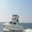

In [ ]:
#ook at the image of 10
xtrain[100] # 0 to 255 image data is avaiable

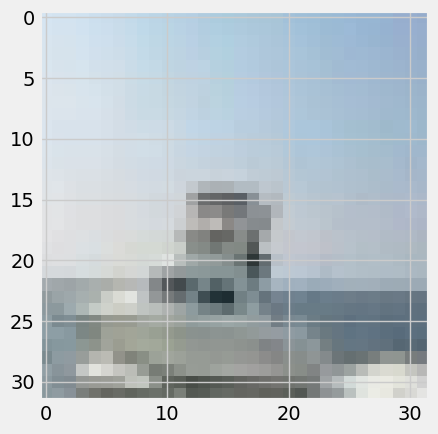

In [ ]:
img = plt.imshow(xtrain[100])


In [ ]:
lbl = ytrain[100]
print(lbl)

[8]


In [ ]:
classification =["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [ ]:
print("image is:",classification[ytrain[10][0]])

image is: deer


In [ ]:
#Change the label into Categorical format
y_train_one_hot = to_categorical(ytrain)
y_test_one_hot = to_categorical(ytest)

In [ ]:
# normalize the pixel values
xtrain = xtrain/255
xtest =xtest/255

xtrain[10]

array([[[3.19635736e-06, 3.92006091e-06, 3.19635736e-06],
        [3.25666599e-06, 3.79944365e-06, 3.13604873e-06],
        [3.37728325e-06, 3.61851776e-06, 3.01543147e-06],
        ...,
        [2.83450558e-06, 3.07574010e-06, 3.01543147e-06],
        [2.47265381e-06, 2.71388832e-06, 2.65357969e-06],
        [1.44740711e-06, 1.68864162e-06, 1.62833299e-06]],

       [[2.77419695e-06, 3.55820914e-06, 2.47265381e-06],
        [3.19635736e-06, 3.73913502e-06, 2.71388832e-06],
        [3.25666599e-06, 3.55820914e-06, 2.65357969e-06],
        ...,
        [2.53296244e-06, 2.77419695e-06, 2.71388832e-06],
        [2.35203655e-06, 2.59327106e-06, 2.53296244e-06],
        [1.68864162e-06, 1.92987614e-06, 1.86956751e-06]],

       [[2.71388832e-06, 3.55820914e-06, 2.29172792e-06],
        [3.01543147e-06, 3.61851776e-06, 2.47265381e-06],
        [2.77419695e-06, 3.13604873e-06, 2.05049340e-06],
        ...,
        [2.29172792e-06, 2.53296244e-06, 2.47265381e-06],
        [2.17111066e-06, 2.41

In [ ]:
# Create an Architecture
model = Sequential()

# First conv layer
model.add(Conv2D(32,(5,5), activation ='relu',input_shape=(32,32,3)))

#Pooling Layer
model.add(MaxPooling2D(pool_size =(2,2)))

# Second conv layer
model.add(Conv2D(32,(5,5), activation ='relu'))

#Pooling Layer 2
model.add(MaxPooling2D(pool_size =(2,2)))

#Flaterring Layer
model.add(Flatten())


#Second Convolution Layer
model.add(Dense(1000,activation= 'relu'))
#Droput Layer
model.add(Dropout(0.5))

#Add a layer
model.add(Dense(500,activation= 'relu'))
#Droput Layer
model.add(Dropout(0.5))

#Final Layer
model.add(Dense(250,activation= 'relu'))



model.add(Dense(10,activation= 'softmax'))


In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         801,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer ='adam',metrics =['accuracy'])

In [ ]:
tr = model.fit(xtrain,y_train_one_hot,batch_size =256, epochs =10, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 427ms/step - accuracy: 0.1038 - loss: 2.3029 - val_accuracy: 0.1014 - val_loss: 2.3028
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 429ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 478ms/step - accuracy: 0.0965 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3029
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 430ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 489ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 436ms/step - accuracy: 0.0993 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 413ms/step - accuracy: 0.0968 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 434ms/step - accuracy: 0.1009 - loss: 2

In [ ]:
model.evaluate(xtest,y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.1006 - loss: 2.3026


[2.302611827850342, 0.10000000149011612]

In [ ]:
eiffle= plt.imread("/content/download.jfif")

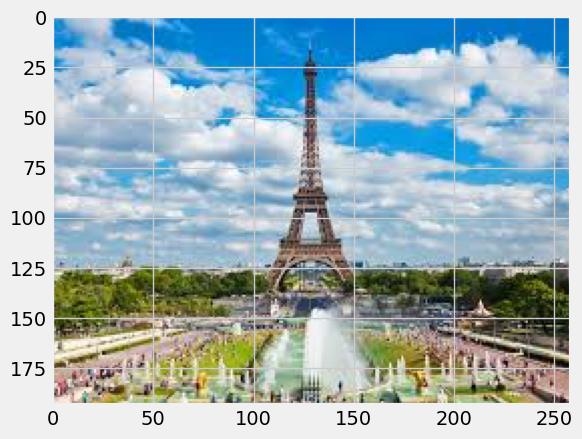

In [ ]:
img = plt.imshow(eiffle)

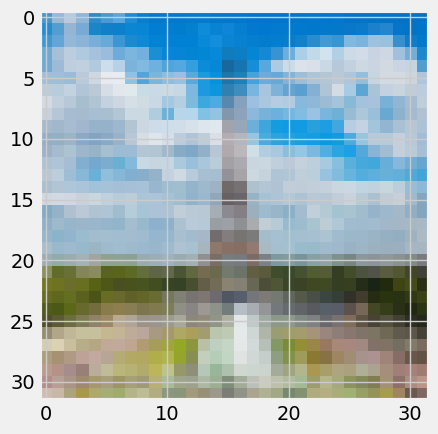

In [ ]:
#resize the image
#!pip install scikit-image
from skimage import transform

resize = transform.resize(eiffle,(32,32,3))
img_1 = plt.imshow(resize)
